In [19]:
##### PROGRAM SETUP #####

# NOTE: please run all cells in order. 

import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

# I cleaned up and read in the data from the API in a project for Tabular & Linked data so for ease i'm just referencing the CSVs 
# /notebooks/dat-229-final-project/raw_csv_files/get-final-project-csvs.ipynb


planets = pd.read_csv("https://raw.githubusercontent.com/ohitsmekatie/dat-229-final-project/main/raw_csv_files/starwars_planets.csv")
# species = pd.read_csv("https://raw.githubusercontent.com/ohitsmekatie/dat-229-final-project/main/raw_csv_files/starwars_species.csv")
# people = pd.read_csv("https://raw.githubusercontent.com/ohitsmekatie/dat-229-final-project/main/raw_csv_files/starwars_people.csv")
films = pd.read_csv("https://raw.githubusercontent.com/ohitsmekatie/dat-229-final-project/main/raw_csv_files/starwars_films.csv")


# species.to_sql("species", dbconn, if_exists = "replace", index = False) 
# people.to_sql("people", dbconn, if_exists = "replace", index = False) 


def create_db_connection():
    dbconn = sql.connect('planets.db')
    cursor = dbconn.cursor()
    return dbconn,cursor 

def create_planet_table(dbconn, cursor):
    # drop the table if it exists to avoid conflicts while re-running the program 
    drop_table = '''
        DROP TABLE IF EXISTS planets;
        '''
    # creates planet table that matches data from cleaned up Star Wars API 
    create_planet_table_sql = '''
        CREATE TABLE IF NOT EXISTS
            planets(
            pid INTEGER PRIMARY KEY,
            name TEXT NOT NULL,
            rotation_period INT,
            orbital_period INT,
            diameter INT,
            climate TEXT,
            gravity INT,
            terrain TEXT,
            surface_water INT,
            population INT

        )
    '''

    # run drop table query 
    cursor.execute(drop_table)
    # commit changes 
    dbconn.commit()
    # run create table query 
    cursor.execute(create_planet_table_sql)

    dbconn.commit()

    # inserting the planet data into the table 
    planets.to_sql('planets', dbconn, if_exists='replace', index = False)
    dbconn.commit()
    
    print()
    print('The planets table has been created successfully and the planet data has been inserted.')

def create_film_table(dbconn,cursor):
    # drop the table if it exists to avoid conflicts while re-running the program 
    drop_table = """
        DROP TABLE IF EXISTS films;
        """
    
    # creates planet table that matches data from cleaned up Star Wars API 
    create_planet_table_sql = """
        CREATE TABLE IF NOT EXISTS
            films(
            fid INTEGER PRIMARY KEY,
            title TEXT NOT NULL,
            opening_crawl TEXT NOT NULL,
            director TEXT NOT NULL,
            release_date TEXT NOT NULL
        )
    """

    # run drop table query 
    cursor.execute(drop_table)
    # commit changes 
    dbconn.commit()
    # run create table query 
    cursor.execute(create_planet_table_sql)
    dbconn.commit()

    # inserting the planet data into the table 
    films.to_sql('films', dbconn, if_exists='replace', index = False)
    dbconn.commit()
    
    print()
    print("The films table has been created successfully and the film data has been inserted.")

    
def close_db_connection(dbconn, cursor):
    dbconn.close()
    cursor.close()
    
    

dbconn, cursor = create_db_connection()
create_planet_table(dbconn, cursor)
create_film_table(dbconn, cursor)


The planets table has been created successfully and the planet data has been inserted.

The films table has been created successfully and the film data has been inserted.


/Users/katie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [20]:
dbconn, cursor = create_db_connection()
clean_films = pd.DataFrame(films, columns = ["title", "opening_crawl", "director", "release_date"])

##### FILM SUMMARY #####

def film_stats():
    count_films = pd.read_sql("SELECT COUNT(DISTINCT title) as num_of_films FROM films;", dbconn)
    print(count_films)
    print()

    george_lucas_directed = pd.read_sql("SELECT COUNT(DISTINCT title) as num_of_lucas_directed_films FROM films WHERE director = 'George Lucas'", dbconn)
    print(george_lucas_directed)
    print()

    non_george_lucas_directed = pd.read_sql("SELECT title FROM films WHERE director <> 'George Lucas'", dbconn)
    print()
    print("These films were not directed by George Lucas:")

    for name in non_george_lucas_directed["title"]:
        print(name)
    print()
    print()
    print("Fun fact! All of the Star Wars movies were released in May!")
    print()
    release_dates = pd.read_sql("SELECT title, release_date FROM films;", dbconn)
    print(release_dates)

def crawl_stats(): 
    print()
    print("Each Star Wars movie started with an opening text crawl that gave an overview of the current state of the Star Wars universe.")
    print()
    print("Here is an example of one from Return of the Jedi: ")
    print()
    print(films["opening_crawl"][2])
    print()
    # A new hope
    hope_char = 0
    for crawl in films["opening_crawl"]:
        for character in films["opening_crawl"][0]:
            hope_char += 1
    print("A New Hope:", hope_char)

    # Empire
    empire_char = 0

    #print(films["opening_crawl"][1])
    for crawl in films["opening_crawl"]:
        for character in films["opening_crawl"][1]:
            empire_char += 1
    print("The Empire strikes back:", empire_char)


    # Jedi 
    jedi_char = 0 
    for crawl in films["opening_crawl"]:
        for character in films["opening_crawl"][2]:
            jedi_char += 1
    print("Return of the Jedi:", jedi_char)


    # # Phantom 
    menace_char = 0 
    for crawl in films["opening_crawl"]:
        for character in films["opening_crawl"][3]:
            menace_char += 1
    print("The Phantom Menace:", menace_char)


    # # Clones 
    clones_char = 0 
    for crawl in films["opening_crawl"]:
        for character in films["opening_crawl"][4]:
            clones_char += 1
    print("Attack of the Clones:", clones_char)

    # # Sith
    sith_char = 0 
    for crawl in films["opening_crawl"]:
        for character in films["opening_crawl"][5]:
            sith_char += 1
    print("Revenge of the Sith:", sith_char)

    crawl_avg = (hope_char + empire_char + jedi_char + menace_char + clones_char + sith_char) / 6
    print()
    print("The average num of characters in a Star Wars crawl is", crawl_avg)
    print("A New Hope had the most characters with a count of", hope_char)


In [21]:
##### PLANET DATA SUMMARY ##### 

dbconn, cursor = create_db_connection()
# Created a new df to avoid having the unnamed: 0 column that kept popping up 
clean_planets = pd.DataFrame(planets, columns = ["name", "rotation_period", "orbital_period", "diameter", "climate", "gravity", "terrain", "surface_water", "population"])

def show_planet_summary():
    print("Summary stats about Star Wars planets ")
    print() 

    print("Planets in the Star Wars world:  ")
    for planet in clean_planets["name"]:
        print(planet)

    print()

    count_of_planets = pd.read_sql("SELECT COUNT(DISTINCT name)as num_of_planets FROM planets;", dbconn)
    print(count_of_planets)
    print()

    max_population = pd.read_sql("SELECT name, MAX(population) as highest_populated_planet from planets where population <> 'unknown'", dbconn)
    print(max_population)
    print()

    min_population = pd.read_sql("SELECT name, MIN(population) as lowest_populated_planet from planets where population <> 'unknown'", dbconn)
    print(min_population)
    print()

    print("The most commonly occuring climate in the Star Wars universe is 'temperate':")
    num_planets = [1, 1, 1, 1, 6]
    index = ['Tropical', 'Murky', 'Frozen',
             'Arid', 'Temperate']
    df = pd.DataFrame({'Number of planets': num_planets}, index = index)
    ax = df.plot.bar(rot=0)
    

In [22]:
#### What Star Wars planet should you live on? #####

def get_preference():
    print("Let's find out what planet you could live on based on population density.")
    print() 

    print("""Choose the option that best suits you:

    1. Not being bothered by lots of people/aliens sounds great. 100 miles to the closest store? Totally fine.
    2. I like some action, but don't want it to be in my face all the time. Seeing humans/aliens from time to time sounds good to me.
    3. Pack me into a highrise complex with tons of people any day. I want to roll out of bed and be surrounded by people/aliens. 

    """)

    user_input = input("Type the number of the option: ")
    return user_input


def show_ideal_planet(user_input):
    if user_input == "1":
        low_density = pd.read_sql("SELECT name, population FROM planets WHERE (population <= 1000 AND population <> 'unknown') ORDER BY 2 DESC;", dbconn)
        print()
        print("You would probably like living on the following planets:")
        print()
        print(low_density)

    if user_input == "2":

        mid_density = pd.read_sql("SELECT name, population FROM planets WHERE (population > 1001 AND population <= 2000000000 AND population <> 'unknown') ORDER BY 2 DESC;", dbconn)
        print()
        print("You would probably like living on the following planets:")
        print()
        print(mid_density)
        
    if user_input == "3":
        high_density = pd.read_sql("SELECT name, population FROM planets WHERE (population >= 2000000000 AND population <> 'unknown') ORDER BY 2 DESC", dbconn)
        print()
        print("You would probably like living on the following planets:")
        print()
        print(high_density)


In [23]:
##### FILM QUIZ #####

def film_quiz():
    num_of_points = 0 

    print("Let's see how much you know about Star Wars so far!")
    print()

    movie_guess = input("How many Star Wars movies are there? Type a number guess: ")

    if movie_guess == '6':
        num_of_points += 1
        print()
        print("That's correct! There are 6 movies in the Star Wars franchise. Good job!")
        print()
        for title in clean_films["title"]:
            print(title)
    else:
        print()
        print("Sorry, that's wrong. There are 6 movies in the Star Wars franchise. Better luck next time.")
        print()
        for title in clean_films["title"]:
            print(title)

    planet_guess = input("How many planets are there in the Star Wars universe? Type a number guess: ")

    if planet_guess == '10':
        num_of_points += 1
        print()
        print("That's correct! There are 10 planets in the Star Wars universe. Good job!")
        print()
        for planet in clean_planets["name"]:
            print(planet)
        print()
    else:
        print()
        print("Sorry, that's wrong. There are 10 planets in the Star Wars universe. Better luck next time.")
        print()
        for planet in clean_planets["name"]:
            print(planet)
        print()

    director_guess = input("How many films did George Lucas direct? Type a number guess. ")
    if director_guess == "4":
        num_of_points += 1
        print()
        print("That's Correct! George Lucas direct 4 out of the 6 Star Wars films. Good job!")
    else:
        print()
        print("Sorry, that's wrong. George Lucas direct 4 out of the 6 Star Wars films. Better luck next time.")
        print()
    
    
    print("""In which month were all the Star Wars movies released?

    1. January
    2. March
    3. October
    4. May 
    """)

    month_guess = input("Type the number that corresponds to your guess: ")
    if month_guess == "4":
        num_of_points += 1
        print()
        print("That's correct! All of the Star Wars movies were released in May. Good job!")
        print()
    else:
        print("Sorry, that's wrong. All of the Star Wars movies were released in May. Better luck next time.")
    
    print()
    print()
    print("Your total number of points:", num_of_points, "out of 4 total points.")

   num_of_films
0             6

   num_of_lucas_directed_films
0                            4


These films were not directed by George Lucas:
The Empire Strikes Back
Return of the Jedi


Fun fact! All of the Star Wars movies were released in May!

                     title release_date
0               A New Hope   1977-05-25
1  The Empire Strikes Back   1980-05-17
2       Return of the Jedi   1983-05-25
3       The Phantom Menace   1999-05-19
4     Attack of the Clones   2002-05-16
5      Revenge of the Sith   2005-05-19



Each Star Wars movie started with an opening text crawl that gave an overview of the current state of the Star Wars universe.

Here is an example of one from Return of the Jedi: 

Luke Skywalker has returned to
his home planet of Tatooine in
an attempt to rescue his
friend Han Solo from the
clutches of the vile gangster
Jabba the Hutt.

Little does Luke know that the
GALACTIC EMPIRE has secretly
begun construction on a new
armored space station even
more powerful

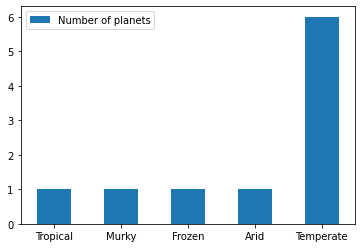

In [24]:
##### PRINT SUMMARY STATS FOR FILMS AND PLANETS #####

film_stats()
print()
print()
crawl_stats()
print()
print()
show_planet_summary()

In [ ]:
##### PRINT WHERE WOULD YOU LIVE #####

print()
print()
show_ideal_planet(get_preference())



Let's find out what planet you could live on based on population density.

Choose the option that best suits you:

    1. Not being bothered by lots of people/aliens sounds great. 100 miles to the closest store? Totally fine.
    2. I like some action, but don't want it to be in my face all the time. Seeing humans/aliens from time to time sounds good to me.
    3. Pack me into a highrise complex with tons of people any day. I want to roll out of bed and be surrounded by people/aliens. 

    


In [ ]:
##### FILM QUIZ ##### 

print()
print()
film_quiz()

In [ ]:
dbconn.close()
cursor.close()